## P values in logistic regression

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

A random variable is one that can take on many values randomly

For example the number of children in any given class, or their mean height or weight.

See below a simulation of 100 child weights, with 16 being the mean, and a standard deviation of 2.

(array([ 7.,  9., 22., 24., 20., 12.,  3.,  2.,  0.,  1.]),
 array([11.20804178, 12.50370404, 13.7993663 , 15.09502856, 16.39069081,
        17.68635307, 18.98201533, 20.27767759, 21.57333985, 22.86900211,
        24.16466437]),
 <BarContainer object of 10 artists>)

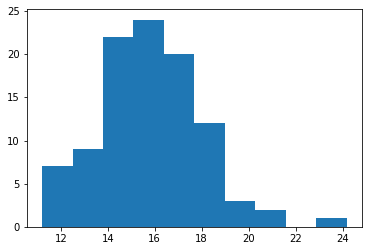

In [6]:
weight = norm(loc=16, scale=2)
child_weights = weight.rvs(100)
plt.hist(child_weights)

The histogram will show you which weights are the most common. 

Naturally, for a unimodal distribution, the most common weight should be around the mean, and then less common weights are on the tails on either side. We have a child weighting 24 kilos as an outlier on the right, making the distribution a little bit right skewed.

The means here have a **normal distribution** this is the most common and therefore most important distribution in stats. It has the shape of a bell. Hence the so-called "bell curve".

Lets now plot the density (pretty much the same as the histogram, but smooth) for 10000 random normals so you can see the bell clearly.

<AxesSubplot:ylabel='Density'>

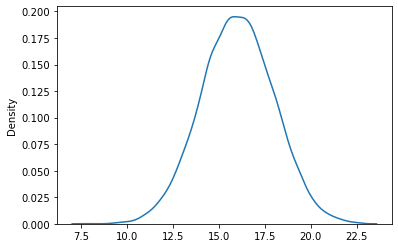

In [11]:

child_weights2 = weight.rvs(10000)
sns.kdeplot(child_weights2)


The normal distribution most common values are in the center of the bell, and they get less common towards the tails. 

The rule is that 95% of the values are within aprox the 2 standard deviations of the mean. 

That is they are located within the two red lines below (the blue line is the mean)

This means that values on the left and right tails will be very rare. The further along the tail, the more rare. 


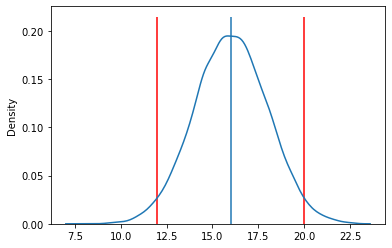

In [18]:
fig, ax = plt.subplots()
sns.kdeplot(child_weights2, ax = ax)
plt.vlines(16, 0, 0.215)
plt.vlines(12, 0, 0.215, color='red')
plt.vlines(20, 0, 0.215, color='red')

Now lets connect to Logistic regression. 

Now, here is the thing, an operation on a random variable is generally also a random variable, thus **the logistic regression coefficient is also a random variable**

Thus there will be a mean regression coefficient of sorts, and a range of common values (95%) to the left and right of that mean.

Lets use logistic regression to see how well sepal length predicts if a orchid is setosa or not.


In [49]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df.head(4)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa


In [50]:
# Some mandatory wrangling
df['is_setosa'] = df.variety.apply(lambda x: 1 if x=="Setosa" else 0)
df.rename({"sepal.length":"sepal_length", "petal.length" : "petal_length", "sepal.width" : "sepal_width"}, axis = 1, inplace=True) 
random = np.random.random(150)
randomdf = pd.DataFrame({'random':random})
df = pd.concat([df, randomdf], axis=1)
df.head()



,sepal_length,sepal_width,petal_length,petal.width,variety,is_setosa,random
0,5.1,3.5,1.4,0.2,Setosa,1,0.656731
1,4.9,3.0,1.4,0.2,Setosa,1,0.229436
2,4.7,3.2,1.3,0.2,Setosa,1,0.378982
3,4.6,3.1,1.5,0.2,Setosa,1,0.253530
4,5.0,3.6,1.4,0.2,Setosa,1,0.397221


In [53]:
# now we fit the model and get the results
model1 = smf.logit("is_setosa ~ sepal_length + random",data = df).fit()

Optimization terminated successfully.
         Current function value: 0.239454
         Iterations 8


In [54]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_setosa   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                  0.6238
Time:                        12:44:17   Log-Likelihood:                -35.918
converged:                       True   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                 1.361e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       27.8281      4.827      5.765      0.000      18.367      37.289
sepal_length    -5.1748      0.900     -5.749      0.000      -6.939      -3.410
random          -0.0095      1.158     -0.008      0.993      -2.280       2.261
================================================================================
"""

The p value here has to do with where the coefficient of -5.17 finds itself in a hypothesized random sample of coefficients that are assumed to be centered on a null coefficient of 0 and with the observed standard error

So... 

In [58]:
# Lets create a normal distribution of coefficients with the null value and the standard error
coef_norm = norm(0, 0.9)
coef_variates = coef_norm.rvs(10000)


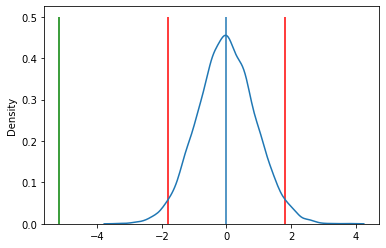

In [65]:
fig, ax = plt.subplots()
sns.kdeplot(coef_variates)
plt.vlines(0,0,0.5)
lower_bound = 0-(0.9*2)
higher_bound = 0+(0.9*2)
plt.vlines(lower_bound,0,0.5,color='red')
plt.vlines(higher_bound,0,0.5,color='red')
plt.vlines(-5.17,0,0.5,color='green')

The red lines contain 95% of the results. The green line is our observed coefficient.

The message of this is: if we had assumed the coefficient were 0 --that is no effect of the variate on outcomes-- then we might see by chance coefficients of 1 or 2, but the coefficient of -5.17 is so rare that it is extremely unlikely that we could find it by chance. 

That is to say there is a probability of 0.000... etc of seeing a coefficient of this value, if we assume that the true coefficient is 0, so we should revise that assumption. The true coefficient is not likely to be 0. 
